<h3 style="color:#fc034e;">Problem Solving for Industry - CA</h3>

<p style="color:#828282;">BSc in Computing in IT - Sept 2022 cohort<br>
Problem Solving for Industry<br>
Capstone Group Project<br>
19th May 2023 (23:59 Irish Time)<br></p>


In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns


<h4 style="color:#fc034e;">Attribute Information:</h4>
<p>
Attribute 1: (qualitative)<br>
Status of existing checking account<br>
A11 : ... < 0 DM<br>
A12 : 0 <= ... < 200 DM<br>
A13 : ... >= 200 DM / salary assignments for at least 1 year<br>
A14 : no checking account<br><br>

Attribute 2: (numerical)<br>
Duration in month<br><br>

Attribute 3: (qualitative)<br>
Credit history<br>
A30 : no credits taken/ all credits paid back duly<br>
A31 : all credits at this bank paid back duly<br>
A32 : existing credits paid back duly till now<br>
A33 : delay in paying off in the past<br>
A34 : critical account/ other credits existing (not at this bank)<br><br>

Attribute 4: (qualitative)<br>
Purpose<br>
A40 : car (new)<br>
A41 : car (used)<br>
A42 : furniture/equipment<br>
A43 : radio/television<br>
A44 : domestic appliances<br>
A45 : repairs<br>
A46 : education<br>
A47 : (vacation - does not exist?)<br>
A48 : retraining<br>
A49 : business<br>
A410 : others<br>

Attribute 5: (numerical)<br>
Credit amount<br><br>

Attibute 6: (qualitative)<br>
Savings account/bonds<br>
A61 : ... < 100 DM <br>
A62 : 100 <= ... < 500 DM <br>
A63 : 500 <= ... < 1000 DM <br>
A64 : .. >= 1000 DM<br>
A65 : unknown/ no savings account<br><br>

Attribute 7: (qualitative)<br>
Present employment since<br>
A71 : unemployed<br>
A72 : ... < 1 year <br>
A73 : 1 <= ... < 4 years <br>
A74 : 4 <= ... < 7 years <br>
A75 : .. >= 7 years<br>

Attribute 8: (numerical)<br>
Installment rate in percentage of disposable income<br><br>

Attribute 9: (qualitative)<br>
Personal status and sex<br>
A91 : male : divorced/separated<br>
A92 : female : divorced/separated/married<br>
A93 : male : single<br>
A94 : male : married/widowed<br>
A95 : female : single<br><br>

Attribute 10: (qualitative)<br>
Other debtors / guarantors<br>
A101 : none<br>
A102 : co-applicant<br>
A103 : guarantor<br><br>

Attribute 11: (numerical)<br>
Present residence since<br><br>

Attribute 12: (qualitative)<br>
Property<br>
A121 : real estate<br>
A122 : if not A121 : building society savings agreement/ life insurance<br>
A123 : if not A121/A122 : car or other, not in attribute 6<br>
A124 : unknown / no property<br><br>

Attribute 13: (numerical)<br>
Age in years<br><br>

Attribute 14: (qualitative)<br>
Other installment plans<br>
A141 : bank<br>
A142 : stores<br>
A143 : none<br><br>

Attribute 15: (qualitative)<br>
Housing<br>
A151 : rent<br>
A152 : own<br>
A153 : for free<br>

Attribute 16: (numerical)<br>
Number of existing credits at this bank<br>

Attribute 17: (qualitative)<br>
Job<br>
A171 : unemployed/ unskilled - non-resident<br>
A172 : unskilled - resident<br>
A173 : skilled employee / official<br>
A174 : management/ self-employed/<br>
highly qualified employee/ officer<br><br>

Attribute 18: (numerical)<br>
Number of people being liable to provide maintenance for<br><br>

Attribute 19: (qualitative)<br>
Telephone<br>
A191 : none<br>
A192 : yes, registered under the customers name<br><br>

Attribute 20: (qualitative)<br><br>
foreign worker<br>
A201 : yes<br>
A202 : no<br><br>
Source: [UCI - Center for Machine Learning and Intelligent Systems](<https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)>)

</p>


In [2]:
df_german = pd.read_excel('german-formatted.xlsx')

In [3]:
df_german.head(3)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


In [4]:
new_names = {'Column1': 'Status Existing Checking Account', 'Column2': 'Duration in month', 'Column3': 'Credit History', 'Column4': 'Purpose', 'Column5': 'Credit_amount', 'Column6': 'Savings account/bonds', 'Column7': 'Present Employment Since', 'Column8': 'Installment rate in percentage of disposable income', 'Column9': 'Personal status and sex', 'Column10': 'Other debtors/guarantors',
             'Column11': 'Present residence since', 'Column12': 'Property', 'Column13': 'Age in years', 'Column14': 'Other installment plans', 'Column15': 'Housing', 'Column16': 'Number of existing credits at this bank', 'Column17': 'Job', 'Column18': 'Number of people being liable to provide maintenance for', 'Column19': 'Telephone', 'Column20': 'Foreign worker', 'Column21': 'Cost Matrix'}
df_german.rename(columns=new_names, inplace=True)

---


In [5]:
df_german['Installment rate in percentage of disposable income'].value_counts()

4    476
2    231
3    157
1    136
Name: Installment rate in percentage of disposable income, dtype: int64

In [6]:
df_german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status Existing Checking Account                          1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit History                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present Employment Since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [7]:
df_german.describe()

,Duration in month,Credit_amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Cost Matrix
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


---


In [8]:
profile = ProfileReport(df_german, title="Pandas Profiling Report")


In [9]:
# Usado apenas para pré-visualização pessoal. Os gráficos serão gerados após.
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<h1 style="color:#fc034e;">Correlation between columns</h1>


<p style="color:#2F7387;">With this dynamics analysis, it is not clear what each column can represent for the credit value, in my opinion.<br><br>
Using only numeric values we have got differents coorrelations.</p>

# Plot pandas correlation with colors
corr = df_german.corr(numeric_only=True)
# fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns, ha='center')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


<h1 style="color:#fc034e;">Credit amount distribution</h1>

<h4 style="color:#fc034e;">At first, I have checked how much credit is usually released/requested.</h4>

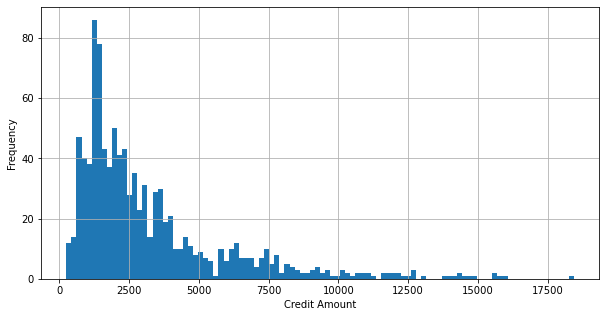

In [14]:
df_german.Credit_amount.hist(bins=100, figsize=(10, 5))
plt.ylabel('Frequency')
plt.xlabel('Credit Amount')
plt.show()

<h1 style="color:#fc034e;">Jobs</h1>

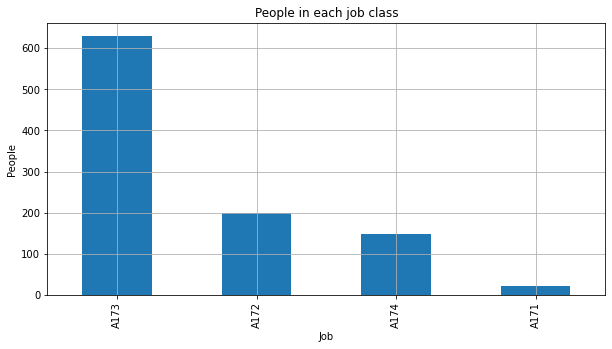

In [15]:
# Qual classe de trabalho tem mais pessoas nesse dataset?
df_german['Job'].value_counts().plot(kind='bar', figsize=(10, 5), grid=True)
plt.ylabel('People')
plt.xlabel('Job')
plt.title('People in each job class')
plt.show()

<h1 style="color:#fc034e;">Mean age per job class</h1>

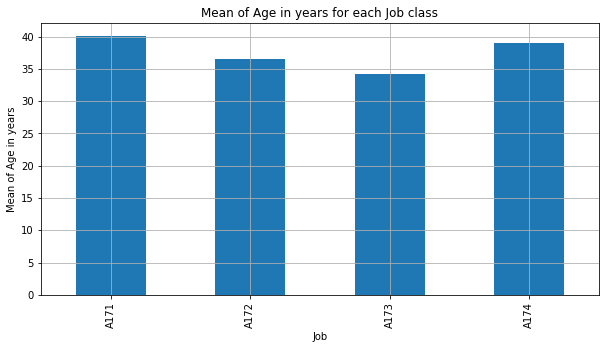

In [16]:
# Para cada classe de trabalhador, qual a média de idade?
df_german.groupby('Job')['Age in years'].mean().plot(
    kind='bar', figsize=(10, 5), grid=True)
plt.ylabel('Mean of Age in years')
plt.title("Mean of Age in years for each Job class")
plt.show()

<h1 style="color:#fc034e;">Properties per Job class</h1>

In [17]:
# What woud be the coorelation by property for each worker class?
# Para cada classe de trabalhador, qual a relação de propriedade? Exibido em dois formatos

# df_german.groupby('Job')['Property'].value_counts()#.plot(kind='bar', figsize=(10, 5),grid=True)
# .plot(kind='matrix', figsize=(10, 5),grid=True)
cross = pd.crosstab(df_german.Job, df_german.Property)
sns.heatmap(cross, cmap=colormap, annot=True, fmt=".2f")  # Matrix plot
plt.title('Property frequency for each Job class')
plt.show()
cross.plot(kind='bar', figsize=(10, 5), grid=True)  # bar plot
plt.ylabel('Frequency')
plt.title('Property frequency for each Job class')

plt.show()

NameError: name 'colormap' is not defined

<h1 style="color:#fc034e;">JobsCredit amount per age</h1>

Text(0.5, 1.0, 'Mean of Credit Amount for each Age')

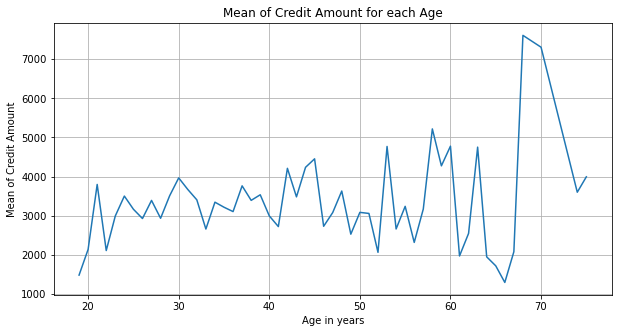

In [23]:
# Credit distributon by age
df_german.groupby('Age in years')['Credit_amount'].mean().plot(kind='line', figsize=(10, 5), grid=True)
plt.ylabel('Mean of Credit Amount')
plt.title('Mean of Credit Amount for each Age')

<h1 style="color:#fc034e;">Numeric Dataset</h1>


In [19]:
df_german_n = pd.read_excel('german.data-numeric-formatted.xlsx')

In [20]:
new_names = {'Column1': 'Status Existing Checking Account', 'Column2': 'Duration in month', 'Column3': 'Credit History', 'Column4': 'Purpose', 'Column5': 'Credit_amount', 'Column6': 'Savings account/bonds', 'Column7': 'Present Employment Since', 'Column8': 'Installment rate in percentage of disposable income', 'Column9': 'Personal status and sex', 'Column10': 'Other debtors/guarantors',
             'Column11': 'Present residence since', 'Column12': 'Property', 'Column13': 'Age in years', 'Column14': 'Other installment plans', 'Column15': 'Housing', 'Column16': 'Number of existing credits at this bank', 'Column17': 'Job', 'Column18': 'Number of people being liable to provide maintenance for', 'Column19': 'Telephone', 'Column20': 'Foreign worker', 'Column21': 'Cost Matrix'}
df_german_n.rename(columns=new_names, inplace=True)

In [21]:
# Numerical Dataset
df_german_n.head(3)

,Status Existing Checking Account,Duration in month,Credit History,Purpose,Credit_amount,Savings account/bonds,Present Employment Since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors/guarantors,...,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix,Column22,Column23,Column24,Column25,Column26,Column27
0,NaN,1,6,4,12,5,5,3,4,1,...,0,1,0,0,1,0,0,1,1,NaN
1,NaN,2,48,2,60,1,3,2,2,1,...,0,1,0,0,1,0,0,1,2,NaN
2,NaN,4,12,4,21,1,4,3,3,1,...,0,1,0,0,1,0,1,0,1,NaN


<p style="color:#b603fc;">Dropping the attribute "Status Existing Checking Account" because there is just NAN</p>


Não use implace. Prefira `df=df.drop` ou qualquer outra função de alteração para melhor legibilidade.


In [ ]:
df_german_n = df_german_n.drop(columns=['Status Existing Checking Account', 'Column22', 'Column23',
                                        'Column24', 'Column25', 'Column26', 'Column27'])


In [ ]:
# Numerical Dataset
df_german_n.head(3)


In [ ]:
profile = ProfileReport(df_german_n, title="Pandas Profiling Report")


In [ ]:
profile.to_widgets()


<p style="color:#b603fc;">Now we can identify there are some differences from the original dataset and the numeric one. </p>


In [ ]:
df_german_n.info()
